In [2]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
with open("../data/df-raw.pkl", "rb") as f:
    df = pickle.load(f)
df

,"Karjakin,Sergey","Caruana,F",Ding Liren,"Giri,A","So,W","Nakamura,Hi","Anand,V","Firouzja,Alireza","Nepomniachtchi,I","Radjabov,T"
0,"[24, 39, 32, 40, 21, 7, 14, 23, 17, 19, 26, 10...","[33, 27, 41, 32, 39, 39, 30, 42, 54, 57, -8, 2...","[30, 45, 42, 41, 36, 29, 33, 38, 36, 49, 41, 3...","[25, 38, 37, 29, 43, 44, 55, 50, 50, 52, 57, 4...","[None, None, None, None, None, None, None, Non...","[19, 19, 44, 38, 27, 28, 45, 42, 46, 42, -12, ...","[17, 31, 26, 28, 23, 43, 42, 44, 45, 30, 40, 3...","[23, 27, 25, 34, 27, 51, 35, 38, 37, 43, 34, 2...","[28, 35, 39, 34, 28, 21, 9, 25, 13, 17, -13, -...","[34, 44, 19, 37, 10, 30, 29, 28, 27, 33, 29, 1..."
1,"[47, 36, 29, 41, 32, 40, 46, 48, 54, 54, 54, 5...","[21, 47, 5, 1, 8, 24, 32, 31, 12, 28, 0, 12, 1...","[42, 37, 28, 38, 43, 33, 46, 45, 32, 35, 31, 4...","[34, 28, 18, 37, 14, 16, 14, 24, 24, 14, 13, 1...","[38, 42, 34, 32, 34, 34, 24, 11, 7, 1, -13, -6...","[36, 32, 36, 45, 33, 45, 19, 13, 5, 25, 22, 18...","[35, 45, 37, 44, 40, 45, 16, 11, 9, 3, 9, 36, ...","[44, 46, 42, 48, 40, 46, 47, 45, -111, -119, -...","[28, 40, 38, 34, 31, 29, 32, 45, 39, 39, 50, 4...","[20, 24, 19, 23, 30, 26, -8, -18, -14, -4, -18..."
2,"[36, 36, 3, 12, 2, 13, 6, 0, -7, 6, -12, -4, -...","[29, 32, 19, 35, 31, 44, 24, 34, 33, 30, 29, 4...","[27, 44, 36, 42, 35, 37, 35, 43, 30, 45, 31, 3...","[-14, -26, -31, -26, -26, -32, -22, -5, -35, 1...","[15, 39, 28, 34, 22, 5, 11, 9, 19, 24, 19, 19,...","[36, 44, 40, 36, 5, 19, 25, 32, 43, 43, 30, 18...","[24, 36, 42, 45, 37, 43, 26, 34, 17, 10, 12, 8...","[38, 26, 44, 48, 39, 36, 27, 31, 25, 31, 27, 3...","[36, 29, 32, 45, 46, 44, 42, 47, 52, 45, 33, 4...","[-16, -13, 2, -6, -8, -7, 0, 9, 2, 14, 12, 34,..."
3,"[21, 34, 34, 30, 35, 34, 43, 42, 54, 44, 57, 5...","[21, 37, 37, 35, 22, 7, 20, 21, 22, 22, 27, 31...","[32, 42, 39, 42, 35, 37, 31, 50, 35, 41, 44, 4...","[33, 35, 4, 21, 9, 8, 0, -5, -14, 18, 7, 13, 1...","[35, 36, 36, 31, 30, 37, 37, 49, 34, 29, 31, 2...","[38, 40, 33, 23, 10, 10, 8, 13, 26, 3, 24, 34,...","[25, 43, 46, 28, 24, 34, 48, 45, 43, 54, 42, 5...","[22, 36, 17, 45, 19, 52, 37, 47, 30, 51, 66, 6...","[33, 40, 36, 28, 38, 49, 44, 49, 52, 58, 55, 6...","[37, 36, 42, 40, 44, 36, 27, 33, 0, 11, -26, 3..."
4,"[28, 34, 40, 27, 31, 38, 30, 40, 22, 29, 21, 3...","[29, 69, 61, 93, 106, 104, 97, 93, 35, 88, 53,...","[24, 34, 27, 30, 41, 42, 18, 33, 21, 14, 10, 1...","[27, 34, 30, 39, 39, 40, 21, 38, 14, 14, 2, 0,...","[24, 32, 26, 31, 31, 36, 24, 33, 13, 39, 38, 5...","[-15, -20, -4, -14, -10, 16, 16, 28, 13, 32, 2...","[29, 45, 35, 40, 24, 32, 13, 21, 17, 24, 20, 1...","[27, 32, 23, 16, 19, 29, 42, 24, 10, 21, 2, 33...","[26, 20, 15, 25, 26, 24, 18, 8, 30, 25, 28, 20...","[24, 20, 21, 28, 33, 44, 24, 13, 21, 24, -1, 1..."
...,...,...,...,...,...,...,...,...,...,...
245,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[32, 34, None, None, None, None, None, None, N...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
246,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[34, 36, 46, 40, 33, 42, 31, 28, 34, 38, 24, 2...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
247,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[Non

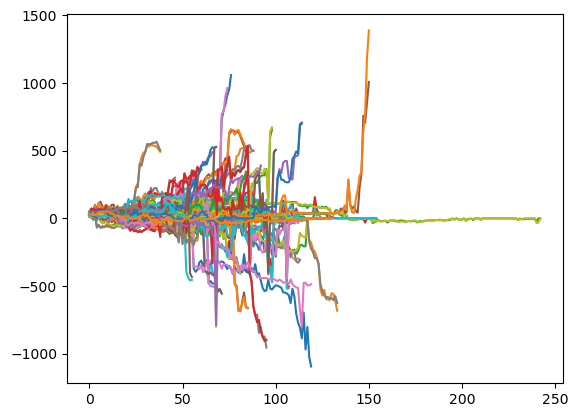

In [4]:
fig, ax = plt.subplots()

for game in df["Anand,V"]:
    sns.lineplot(game, ax=ax)